# Loading CSV File, Removing "Category" Column, Data Preparation

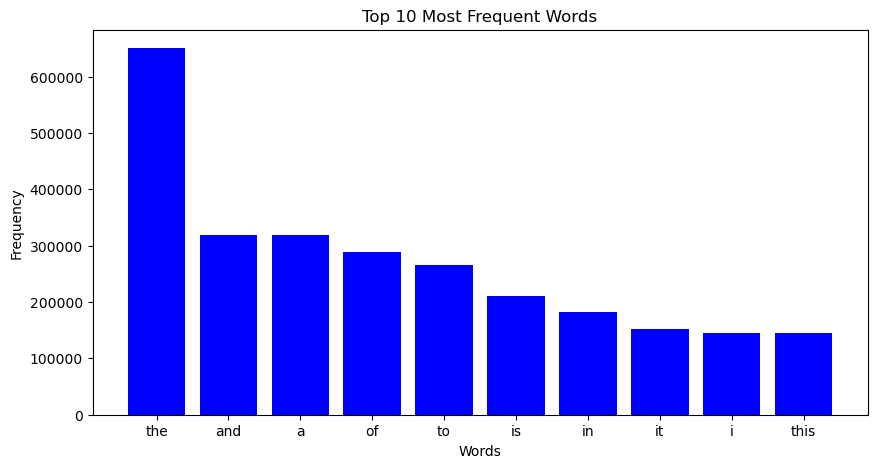

Cleaned dataset saved to: C:\Users\Sir Arktur\Desktop\Final Project\archive (3)\cleaned_reviews.csv


In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt


# 1. Load CSV File
file_path = r"C:\Users\Sir Arktur\Desktop\Final Project\archive (3)\IMDB Dataset.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Assuming your CSV has columns named 'review' and 'sentiment'
# Drop the 'Category' column (if it exists)
if 'sentiment' in df.columns:
    df.drop(columns=['sentiment'], inplace=True)

# 2. Clean Text
def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text

df['clean_text'] = df['review'].apply(clean_text)  # Replace 'review' with the actual column name for text data

# 3. Tokenize Text
def regex_tokenize(text):
    return re.findall(r'\b\w+\b', text)

df['tokens'] = df['clean_text'].apply(regex_tokenize)

# 4. Descriptive Analytics
# Flatten the list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]
word_counts = Counter(all_tokens)

# Top 10 most common words
top_words = word_counts.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='blue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 5. Save the Cleaned Dataset (Optional)
# Save the cleaned dataset for future use
cleaned_file_path = r"C:\Users\Sir Arktur\Desktop\Final Project\archive (3)\cleaned_reviews.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

In [4]:
df.head(5)

,review,clean_text,tokens
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


# VADER Sentiment Dictionary

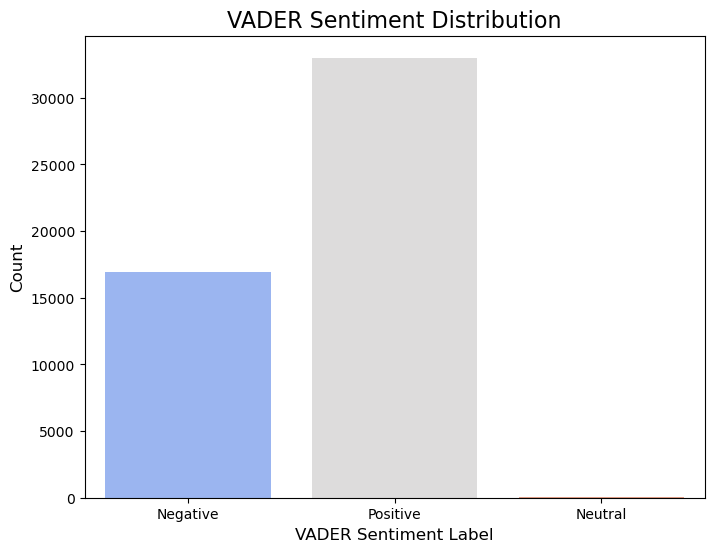

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER Sentiment Analyzer
sent = SentimentIntensityAnalyzer()

# Apply VADER to calculate sentiment scores
df['vader_score'] = df['clean_text'].apply(lambda cleaned: sent.polarity_scores(cleaned))

# Extract the compound score
df['vader_Comp'] = df['vader_score'].apply(lambda score_dict: score_dict['compound'])

# Assign sentiment labels based on the compound score
def label_vader(vader_score):
    if vader_score == 0:
        return 'Neutral'
    elif vader_score > 0:
        return 'Positive'
    else:
        return 'Negative'

df['vader_label'] = df['vader_Comp'].apply(label_vader)

# Visualize the VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_label', data=df, palette='coolwarm')
plt.title('VADER Sentiment Distribution', fontsize=16)
plt.xlabel('VADER Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Creating a Custom Sentiment Dictionary

In [6]:
# Expanded custom sentiment dictionary
custom_sentiment_dict = {
    # Positive words
    "good": 1,
    "great": 2,
    "excellent": 3,
    "amazing": 3,
    "fantastic": 3,
    "wonderful": 3,
    "outstanding": 3,
    "brilliant": 2,
    "happy": 2,
    "joyful": 3,
    "love": 2,
    "like": 1,
    "satisfied": 2,
    "awesome": 3,
    "beautiful": 2,
    "positive": 2,
    "success": 2,
    "best": 3,
    "fabulous": 3,
    "superb": 3,
    "terrific": 3,
    "perfect": 3,
    "kind": 2,

    # Negative words
    "bad": -1,
    "terrible": -2,
    "awful": -3,
    "poor": -2,
    "horrible": -3,
    "sad": -2,
    "angry": -2,
    "hate": -2,
    "dislike": -1,
    "unsatisfied": -2,
    "worst": -3,
    "failure": -2,
    "negative": -2,
    "ugly": -2,
    "horrendous": -3,
    "disappointed": -2,
    "frustrated": -2,
    "annoyed": -1,
    "miserable": -3,
    "upset": -2,

    # Neutral words
    "okay": 0,
    "neutral": 0,
    "fine": 0,
    "average": 0,
    "standard": 0,
    "normal": 0,
    "regular": 0,
    "mediocre": 0,
    "fair": 0,
    "balanced": 0,
    "unbiased": 0,
    "reasonable": 0,
    "ordinary": 0,
    "moderate": 0,
    "acceptable": 0,
    "indifferent": 0,
    "routine": 0,
    "adequate": 0,
    "passable": 0,
}

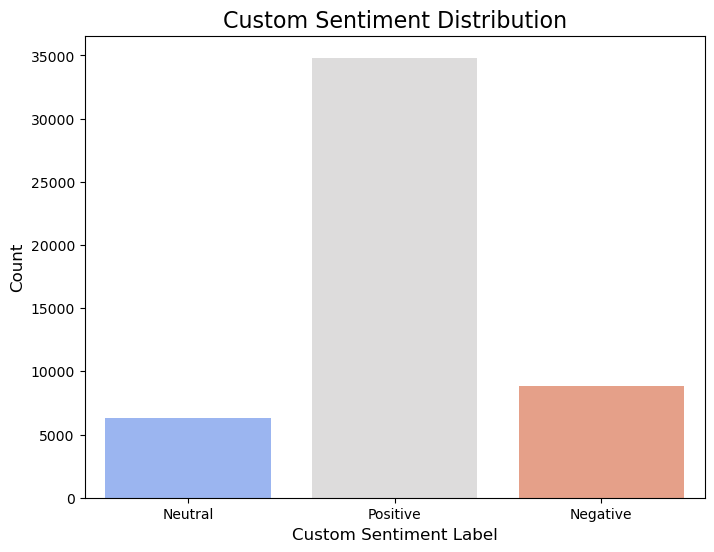

In [7]:
# Function to calculate sentiment score using the custom dictionary
def calculate_custom_sentiment(text, sentiment_dict):
    words = text.split()  # Tokenize text
    score = sum(sentiment_dict.get(word, 0) for word in words)  # Sum up scores of words
    return score

# Apply the custom sentiment scoring to the cleaned text
df['custom_score'] = df['clean_text'].apply(lambda text: calculate_custom_sentiment(text, custom_sentiment_dict))

# Assign sentiment labels based on the custom score
def label_custom_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['custom_label'] = df['custom_score'].apply(label_custom_sentiment)

# Visualize the custom sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='custom_label', data=df, palette='coolwarm')
plt.title('Custom Sentiment Distribution', fontsize=16)
plt.xlabel('Custom Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Models Comparison

Agreement Percentage: 67.39%


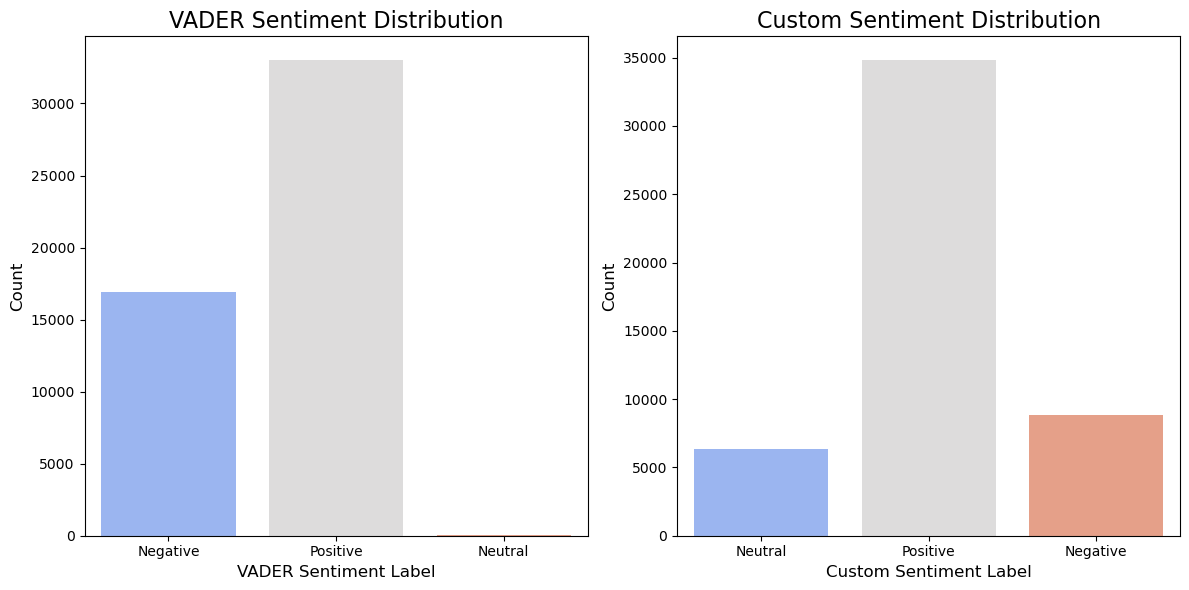

In [8]:
# Compare sentiment labels from VADER and Custom Dictionary
df['comparison'] = df.apply(lambda row: 'Agree' if row['vader_label'] == row['custom_label'] else 'Disagree', axis=1)

# Calculate agreement percentage
agreement_percentage = (df['comparison'].value_counts(normalize=True)['Agree'] * 100)

# Print agreement percentage
print(f"Agreement Percentage: {agreement_percentage:.2f}%")

# Sentiment distribution comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# VADER sentiment distribution
plt.subplot(1, 2, 1)
sns.countplot(x='vader_label', data=df, palette='coolwarm')
plt.title('VADER Sentiment Distribution', fontsize=16)
plt.xlabel('VADER Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Custom dictionary sentiment distribution
plt.subplot(1, 2, 2)
sns.countplot(x='custom_label', data=df, palette='coolwarm')
plt.title('Custom Sentiment Distribution', fontsize=16)
plt.xlabel('Custom Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# Select examples where the models disagree
disagreements = df[df['comparison'] == 'Disagree']

# Display a few samples of disagreements
print("Sample Disagreements:")
print(disagreements[['clean_text', 'vader_label', 'custom_label', 'vader_Comp', 'custom_score']].head())

Sample Disagreements:
                                           clean_text vader_label  \
0   one of the other reviewers has mentioned that ...    Negative   
3   basically theres a family where a little boy j...    Negative   
8   encouraged by the positive comments about this...    Positive   
10  phil the alien is one of those quirky films wh...    Positive   
13  the cast played shakespeareshakespeare losti a...    Positive   

   custom_label  vader_Comp  custom_score  
0       Neutral     -0.9916             0  
3      Positive     -0.9117             1  
8       Neutral      0.2362             0  
10      Neutral      0.9447             0  
13      Neutral      0.3425             0  


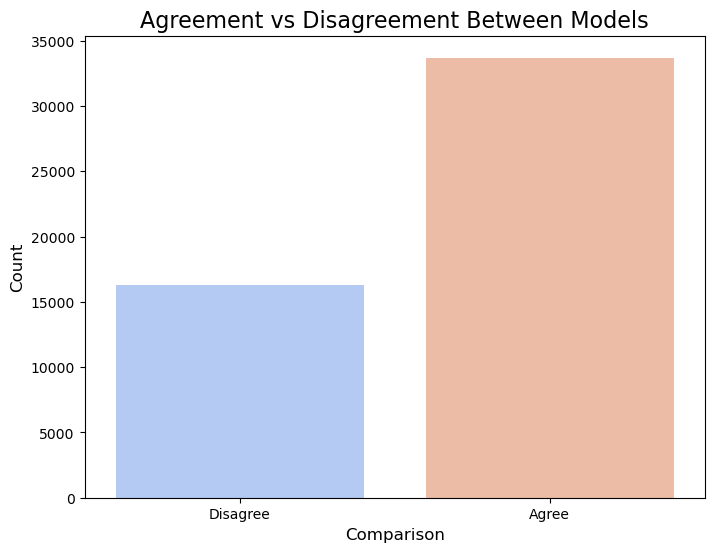

In [10]:
# Visualize agreement vs disagreement
plt.figure(figsize=(8, 6))
sns.countplot(x='comparison', data=df, palette='coolwarm')
plt.title('Agreement vs Disagreement Between Models', fontsize=16)
plt.xlabel('Comparison', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()